## Regression demo for quadratic data

2023.01.28

In [1]:
# regression_demo_quadr.ipynb
# in this model we have two predictors x and x^2
# we will be estimating three weights:
# a - bias or w[0]
# b - weight with x or w[1]
# c - weight with x^2 or w[2]
# 2022.11.11

import numpy as np
print(f'np.__version__ ={np.__version__}')
import pandas as pd
print(f'pd.__version__ ={pd.__version__}')

# import random

np.__version__ =1.23.5
pd.__version__ =1.5.3


#  Regression Model $y=a+bx+cx^2$

# Generate data ($x$, $y$) and plot it.

In [2]:
def generate_data(w=[4,2,7] , N=10, NoiseWeight=1):
  # # parameters   # Fixing random state for reproducibility
  # np.random.seed(9)
  # x = -2 + (10-2)*np.random.random_sample(size=N) # domain [2,10]
  # x = np.sort(x)

  x = np.array([-5,-4,-3,-2,-1,1,2,3,4,5])

  # values
  a, b, c = w[0], w[1], w[2]
  y = a + b*x +c*x**2

  noise = np.random.random_sample(size=N) # random numbers in [0,1]
  noise = noise * np.power(-1,np.abs(x.astype(int))) # shuffle noise up and down
  y_n = y + noise*NoiseWeight

  # w=[4,2,7]
  import matplotlib.pyplot as plt
  # plt.scatter(x, y, s=100*noise, marker='o', c='red', alpha=0.5)
  x1 = np.linspace(start=np.min(x), stop=np.max(x), num=50)
  y1 = w[0]+ w[1]*x1+w[2]*x1**2
  plt.plot(x1, y1, c='blue', ls = ':', label=f'w={w}')

  w2=[3,3,6]
  y2 = w2[0]+ w2[1]*x1+w2[2]*x1**2
  plt.plot(x1, y2, c='cyan', ls = '-.', label=f'w={w2}')

  w3=[-5,3,8]
  y3 = w3[0]+ w3[1]*x1+w3[2]*x1**2
  plt.plot(x1, y3, c='green', ls = '--', label=f'w={w3}')

  plt.scatter(x, y_n, s=100, marker='o', c='red', alpha=0.5)
  plt.xlabel('x', size=20)
  plt.ylabel('$y_n$', size=20)
  plt.legend()
  plt.grid()
  plt.title(f'Regression Problem.\nModel $y=a+bx+cx^2$ ')

  return x, y_n

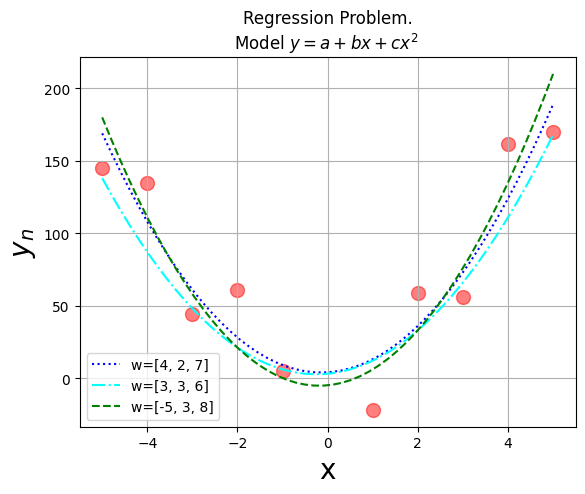

In [3]:
x,y_n=generate_data(w=[4,2,7] , N=10, NoiseWeight=40)

In [ ]:
# pd.DataFrame({'x':x, 'y':y})

# $y= [1, x, x^2]  [a,b,c]^T =
#  \vec{x} \vec{w}$

# Here $\vec{w} =[a,b,c]^T$,  and $\vec{x}=[1, x, x^2]$.
# $\vec{n}=[n_0,...,n_N]^T$  .
#  Then $\vec{y} =  X\vec{w} + \vec{n}$
# w_0, w_1, w_0

# Normal Equation (Vector Projection  approach)

https://godatadriven.com/blog/the-linear-algebra-behind-linear-regression/

## Parabola Model $y = a + b x + c x^2=[a,b,c][1,x,x^2]^T$


Experimental data : $(\vec{x},
\vec{y})$ , where $\vec{x}=[x_1,\dots,x_N]^T$ and $\vec{y}=[y_0,...,y_N]^T$.

Let $\vec{1}=[1,\dots,1]^T$ , $\vec{x}^2=[x_1^2,\dots,x_N^2]^T$, and $X =[ \vec{1}, \vec{x}, \vec{x}^2]$ be $N$ by 3 matrix.

We want to find
 $\hat{w}=[a,b,c]^T$ , such that $\hat{y} =  X\hat{w}$ is the closest vector to $\vec{y}$.



 $\hat{y}=X\hat{w}$ in the subspace $P=span\{ X\}$ closest to $\vec{y}$, hence it is a projection of $\vec{y}$ onto $P$.

Therefore $\vec{y}-X\hat{w}$ is orthogonal to $span\{ X\}$, hence
$$ (\vec{y}-X\hat{w} )^T X=0 $$
$$ X^T (\vec{y}-X\hat{w} )=0 $$
$$ X^T \vec{y}=X^T X\hat{w} $$
$$ \hat{w} = (X^T X)^{-1}X^T \vec{y} $$


In [ ]:
# np.array([x,y])
def find_LinAlg_solution(x,y,print_values=False):
  N = len(x)
  X = np.array([np.ones(N), x, x**2]).T
  XtX_inv = np.linalg.inv(np.matmul((X.T),X))
  tmp = np.matmul(XtX_inv, X.T)
  w_hat = np.matmul(tmp, y)

  if print_values :
    print(f'X={X}')
    print(f'XtX_inv={XtX_inv}')
    print(f'tmp = {tmp}')

  print(f'LA Based Solution:       w_hat={w_hat}')
  return w_hat

LA Based Solution:       w_hat=[4. 2. 7.]


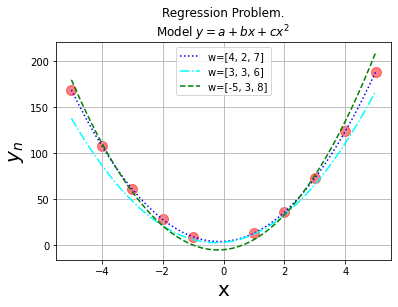

In [ ]:
x,y_n=generate_data(w=[4,2,7] , N=10, NoiseWeight=0)
w_hat = find_LinAlg_solution(x=x, y=y_n)

# Second Derivative (Calculus) + SLE Based Method

https://www.math.uci.edu/~xiangwen/pdf/LaTeX-Math-Symbols.pdf

Model $y = a + bx + cx^2$
$$ e_i = a+bx_i +cx_i^2 - y_i
\qquad \frac{\partial{e_i}}{\partial{a}}=1
\qquad \frac{\partial{e_i}}{\partial{b}}=x_i
\qquad \frac{\partial{e_i}}{\partial{c}}=x_i^2
$$

Cost function $L(a,b,c) = \sum e_i^2$.

# First we find a critical point

$\displaystyle \frac{\partial{L}}{\partial{a}}=2\sum e_i \frac{\partial{e_i}}{\partial{a}} = 2\sum e_i $

$\displaystyle \frac{\partial{L}}{\partial{a}}=0 \qquad \iff \qquad \sum e_i=
 \sum a + b\sum x_i + c\sum x_i^2 - \sum y_i = 0
\qquad \iff \qquad an + b\bar{x}n  + c\sum x_i^2  = \bar{y}n $


$\displaystyle \frac{\partial{L}}{\partial{b}}=2\sum e_i x_i $
$\displaystyle \frac{\partial{L}}{\partial{b}}=0
\qquad \iff \qquad
a\sum x_i +b\sum x_i^2 + c\sum x_i^3  - \sum x_i y_i = 0
\qquad \iff \qquad
 an\bar{x} + b\sum x_i^2 + c\sum x_i^3 = \sum x_i y_i
$


$\displaystyle \frac{\partial{L}}{\partial{c}}=2\sum e_i x_i^2 $

$\displaystyle \frac{\partial{L}}{\partial{c}}=0 \qquad \iff \qquad
 a\sum x_i^2 +b\sum x_i^3 + c\sum x_i^4  = \sum y_i  x_i^2  
$


# Now we can form a SLE in matrix form and solve it.








\begin{equation*}
  \begin{bmatrix}
      n & \sum  x_i & \sum x_i^2\\
      \sum  x_i & \sum x_i^2 & \sum x_i^3 \\
      \sum x_i^2 & \sum x_i^3 & \sum x_i^4
  \end{bmatrix}
  \begin{bmatrix}
a\\
b\\
c
  \end{bmatrix}
   =
  \begin{bmatrix}
    \sum  y_i \\
    \sum  y_i x_i\\
    \sum y_i  x_i^2
  \end{bmatrix}
\end{equation*}






\begin{equation*}
  \begin{bmatrix}
a\\
b\\
c
  \end{bmatrix}
   =
  \begin{bmatrix}
      n & \sum  x_i & \sum x_i^2\\
      \sum  x_i & \sum x_i^2 & \sum x_i^3 \\
      \sum x_i^2 & \sum x_i^3 & \sum x_i^4
  \end{bmatrix}^{-1}
  \begin{bmatrix}
    \sum  y_i  \\
    \sum  y_i x_i\\
    \sum y_i  x_i^2
  \end{bmatrix}
\end{equation*}



In [ ]:
def get_calculus_solution(x,y):
  N = len(x)
  x_bar = np.mean(x)
  y_bar = np.mean(y)
  sum_xy = np.sum(x*y)
  sum_xx = np.sum(x*x)
  M = np.array( [ [N,         np.sum(x),     np.sum(x**2)         ],
                 [ np.sum(x), np.sum(x**2),  np.sum(np.power(x,3))] ,
                 [np.sum(x**2), np.sum(np.power(x,3)), np.sum(np.power(x,4))]
                 ] )
  M_inv = np.linalg.inv(M)
  tmp=np.array([np.sum(y), sum_xy, np.sum(x**2 * y) ])
  w_hat =  np.matmul(M_inv, tmp)
  print(f'Calculus Based Solution: w_hat={w_hat}')
  return w_hat

Calculus Based Solution: w_hat=[5.50480593 2.71233815 6.7009073 ]


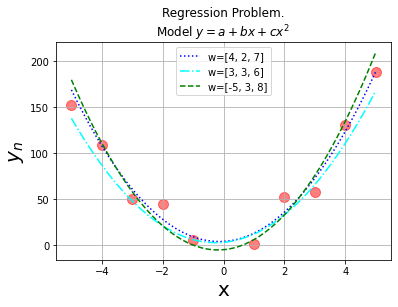

In [ ]:
x,y_n=generate_data(w=[4,2,7] , N=10, NoiseWeight=20)
w_hat=get_calculus_solution(x,y_n)

In [ ]:
w_hat = find_LinAlg_solution(x,y_n)
w_hat = get_calculus_solution(x,y_n)

LA Based Solution:       w_hat=[5.50480593 2.71233815 6.7009073 ]
Calculus Based Solution: w_hat=[5.50480593 2.71233815 6.7009073 ]


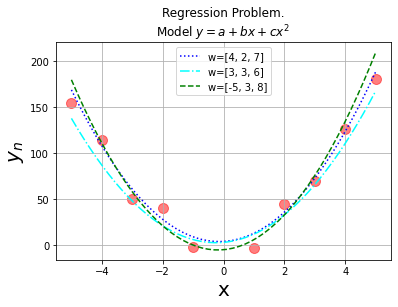

In [ ]:
x,y_n=generate_data(w=[4,2,7] , N=10, NoiseWeight=20)

# NN Model

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras import layers

In [ ]:
def show_NN_solution(model):
  # [a_hat ]= np.array(model.weights[1]).flatten().round().astype(int)
  # [b_hat, c_hat] = np.array(model.weights[0]).flatten().round().astype(int)
  [a_hat ]= np.array(model.weights[1]).flatten()
  [b_hat, c_hat] = np.array(model.weights[0]).flatten()
  w_hat=[a_hat, b_hat, c_hat]
  print(f'NN Based Solution:       w_hat={w_hat}')
  return w_hat

In [ ]:
# model =keras.Sequential([
#     # layers.Dense(64, activation="relu"),
#     layers.Dense(16, activation="relu"),
#     layers.Dense(1)
# ])

model =keras.Sequential([
    # layers.Dense(3, activation="relu"),
    # layers.Dense(1, activation="sigmoid")
    layers.Dense(1)
])

model.compile( optimizer="rmsprop",
               loss="mse",
               metrics=["mae"]) # mean absolute error

In [ ]:
x_train = np.array([x,x**2]).T
# y_n

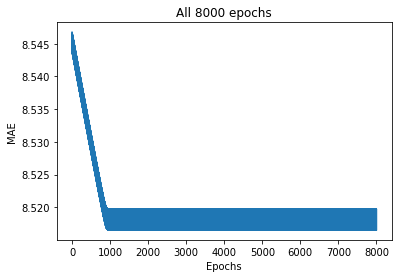

CPU times: user 29 s, sys: 2.91 s, total: 31.9 s
Wall time: 41.1 s


In [ ]:
%%time
Neps = 10000
Neps = 8000
history = model.fit(x_train, y_n, epochs=Neps, batch_size=len(y_n), verbose=0)
mae_history = history.history["mae"]
# mae_history

import matplotlib.pyplot as plt
plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel("Epochs")
plt.ylabel("MAE")
plt.title(f'All {Neps} epochs')
plt.show()

In [ ]:
w_hat = find_LinAlg_solution(x,y_n)
w_hat = get_calculus_solution(x,y_n)
w_hat=show_NN_solution(model)

LA Based Solution:       w_hat=[2.15810741 2.21727774 6.86232117]
Calculus Based Solution: w_hat=[2.15810741 2.21727774 6.86232117]
NN Based Solution:       w_hat=[2.158609, 2.2167776, 6.862821]


In [ ]:
# lastNep=10
# import matplotlib.pyplot as plt
# plt.plot(range(1, len(mae_history[-lastNep:]) + 1), mae_history[-lastNep:])
# plt.xlabel("Epochs")
# plt.ylabel("MAE")
# plt.title(f'Last {lastNep} epochs')
# plt.show()

In [ ]:
# Stop
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (10, 1)                   3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary(line_length=120,
    positions=None,
    print_fn=None,
    expand_nested=False,
    show_trainable=True,
    # layer_range=None
    )

Model: "sequential_8"
___________________________________________________________________________________________________________________________________
 Layer (type)                                         Output Shape                                    Param #           Trainable  
 dense_11 (Dense)                                     (10, 1)                                         3                 Y          
                                                                                                                                   
Total params: 3
Trainable params: 3
Non-trainable params: 0
___________________________________________________________________________________________________________________________________


In [ ]:
model.weights

[<tf.Variable 'dense_11/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[2.2167776],
        [6.862821 ]], dtype=float32)>,
 <tf.Variable 'dense_11/bias:0' shape=(1,) dtype=float32, numpy=array([2.158609], dtype=float32)>]

In [ ]:
model.layers[0].get_weights()

[array([[2.2167776],
        [6.862821 ]], dtype=float32), array([2.158609], dtype=float32)]

In [ ]:
model.layers[0].get_weights()[0]

array([[2.2167776],
       [6.862821 ]], dtype=float32)

In [ ]:
model.layers[0].get_weights()[1]

array([2.158609], dtype=float32)

In [ ]:
# model.summary()
model.weights[1]

<tf.Variable 'dense_11/bias:0' shape=(1,) dtype=float32, numpy=array([2.158609], dtype=float32)>

# STOP-STOP-STOP

In [ ]:
# x = np.array([-5,-4,-3,-2,-1,1,2,3,4,5])
# np.power(-1,np.abs(x.astype(int)))
# np.random.random_sample(10)
# np.linspace(start=np.min(x), stop=np.max(x), num=50)

# NN Solution

https://www.analyticsvidhya.com/blog/2021/06/linear-regression-using-neural-networks/

Here, we’re using two input variables xs and zs, adding some noise to randomly spread the data points, and finally, the target variable is defined as y=2*xs-3*zs+5+noise. The size of the dataset is 1000.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

observations=1000
xs=np.random.uniform(-10,10,(observations,1))
zs=np.random.uniform(-10,10,(observations,1))
generated_inputs=np.column_stack((xs,zs))
noise=np.random.uniform(-10,10,(observations,1))
generated_target=0*xs-3*zs+5+noise

In [ ]:
# np.savez('TF_intro',input=generated_inputs,targets=generated_target)
# training_data=np.load('TF_intro.npz')

In [ ]:
input_size=2
output_size=1
models = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size)
                            ])
custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)
models.compile(optimizer=custom_optimizer,loss='mean_squared_error')

# models.fit(training_data['input'],training_data['targets'],epochs=100,verbose=1)
models.fit( generated_inputs,
            generated_target,
           epochs=100,
           verbose=0)

In [ ]:
models.layers[0].get_weights()

[array([[-0.6369563],
        [-3.1350508]], dtype=float32), array([4.9255724], dtype=float32)]

In [ ]:
models.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
weights=models.layers[0].get_weights()[0]
bias=models.layers[0].get_weights()[1]
print(f'w0 = {weights[1]}')
print(f'w1 = {bias}')

w0 = [-3.1350508]
w1 = [4.9255724]


# STOP-STOP-STOP

In [ ]:
z = np.zeros(N)
generated_inputs = np.column_stack((z,x))
generated_target = y
# generated_inputs=np.column_stack((xs,zs))

NameError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
input_size=2
output_size=1
models = tf.keras.Sequential([
                             tf.keras.layers.Dense(output_size)
                            ])
custom_optimizer=tf.keras.optimizers.SGD(learning_rate=0.02)
models.compile(optimizer=custom_optimizer,loss='mean_squared_error')

# models.fit(training_data['input'],training_data['targets'],epochs=100,verbose=1)
models.fit( generated_inputs,
            generated_target,
           epochs=100,
           verbose=0)

In [ ]:
models.layers[0].get_weights()

In [ ]:
weights=models.layers[0].get_weights()[0]
bias=models.layers[0].get_weights()[1]
print(f'w0 = {bias}')
print(f'w1 = {weights[1]}')


In [ ]:
models.summary()

In [ ]:
X_train = np.array([x,x]).T
X_train.shape[1]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

X_train = np.array(X_train)
X_test = np.array(X_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)
# X_train = np.array(x)
# X_test = np.array(x)
y_train = np.array(y)
y_test = np.array(y)

model = Sequential()

model.add(Dense(X_train.shape[1], activation='relu'))
# model.add(Dense(32, activation='relu'))
# # model.add(Dropout(0.2))

# model.add(Dense(64, activation='relu'))
# # model.add(Dropout(0.2))

# model.add(Dense(128, activation='relu'))
# # model.add(Dropout(0.2))

# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(1))

model.compile(optimizer=Adam(0.00001), loss='mse')

r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=100)

In [ ]:
Reference: BUAN 6382.SW1.S24 course by Dr Farid Khafizov at Naveen Jindal School to Management, UTDallas.